# LIBRARIES

In [1]:
# Recurrent Neural Network

# Part 1 - Data Preprocessing
!pip install yfinance
# Importing the libraries
import pandas as pd
import yfinance as yf
from matplotlib import pyplot as plt
#import datetime
#import time
import requests
import io
import numpy as np

     |████████████████████████████████| 6.3MB 10.7MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=05b849d0047622d8fcffa3306946d9969e9362f518899ff9223fb2f7479f5d98
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


# DATASET

In [2]:
stock = yf.download(['AMZN'],start="2010-01-01", end="2021-01-19") #, progress=False)
dataset_train=stock
stock2 = yf.download(['AMZN'],start="2021-01-19", end="2021-04-05")
dataset_test=stock2
# Importing the training set
cols=6
training_set = dataset_train.iloc[:, 1:cols].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


**DATA** **STRUCTURE**

In [3]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
days=100
for i in range(days, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-days:i, :])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
# Reshaping
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 5))

# RNN

In [4]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fifth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = X_train.shape[2]))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Reshaping
#
#x_input= X_test
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 25, batch_size = 64)

Epoch 1/25
42/42 [==============================] - 28s 487ms/step - loss: 0.0236
Epoch 2/25
42/42 [==============================] - 21s 486ms/step - loss: 0.0025
Epoch 3/25
42/42 [==============================] - 20s 485ms/step - loss: 0.0019
Epoch 4/25
42/42 [==============================] - 20s 485ms/step - loss: 0.0019
Epoch 5/25
42/42 [==============================] - 20s 488ms/step - loss: 0.0023
Epoch 6/25
42/42 [==============================] - 21s 493ms/step - loss: 0.0016
Epoch 7/25
42/42 [==============================] - 21s 489ms/step - loss: 0.0014
Epoch 8/25
42/42 [==============================] - 20s 486ms/step - loss: 0.0014
Epoch 9/25
42/42 [==============================] - 20s 484ms/step - loss: 0.0013
Epoch 10/25
42/42 [==============================] - 20s 485ms/step - loss: 0.0014
Epoch 11/25
42/42 [==============================] - 20s 486ms/step - loss: 0.0012
Epoch 12/25
42/42 [==============================] - 20s 484ms/step - loss: 0.0013
Epoch 13/25
4

# PREDICTIONS

In [5]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price 

real_stock_price = dataset_test.iloc[:, 0:1].values

# Getting the predicted stock price

dataset_total = dataset_train.append(dataset_test)
inputs = dataset_total.iloc[len(dataset_total) - len(dataset_test) - days:, 1:cols].values

inputs = sc.transform(inputs)

X_test = []
for i in range(days, days+len(dataset_test)):
    X_test.append(inputs[i-days:i, 0:cols])
X_test = np.array(X_test)

predicted_stock_price = regressor.predict(X_test)
temp = np.zeros((len(predicted_stock_price), cols-1))
for i in range(0, len(predicted_stock_price)):
    temp[i,0]=predicted_stock_price[i, 0]
    
for_first_g = sc.inverse_transform(temp)[:,0]

VISUALIZING TEST SET AND PREDICTION

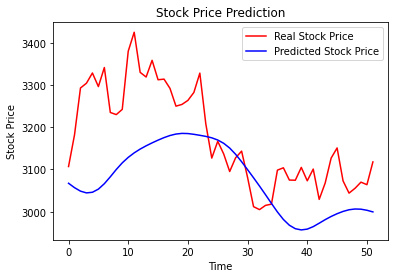

In [6]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(for_first_g, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

CREATE NEW PREDICTIONS

In [7]:
# New predictions
# X is the days to predict 
for x in range(15):  
    inputs= sc.inverse_transform(inputs)
    inputs=np.delete(inputs,(0),axis=0)
    inputs=np.append(inputs,(predicted_stock_price[-1:,:]), axis=0)
    #inputs = inputs.reshape(1,-1)
    inputs = sc.transform(inputs)
    X_test = []
    for i in range(days, days+len(dataset_test)):
        X_test.append(inputs[i-days:i, 0:cols])
    X_test = np.array(X_test)
    predicted_stock_price = regressor.predict(X_test)
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)


temp = np.zeros((len(predicted_stock_price), cols-1))
for i in range(0, len(predicted_stock_price)):
    temp[i,0]=predicted_stock_price[i, 0]

ff = (temp)[:,0]

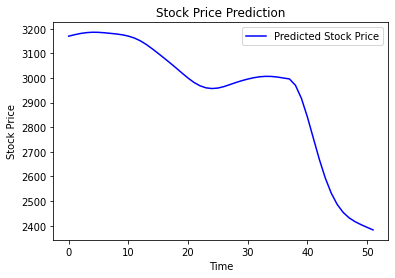

In [8]:
# Visualising the results
#plt.plot(real_stock_price[:,:1], color = 'red', label = 'Real Stock Price')
plt.plot(ff, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

ADDING THE NEXT DAYS ON THE TEST SET IN ORDER TO VISUALIZE THEM

In [9]:
from pandas.tseries.offsets import DateOffset
length = len(ff)
future_dates = [dataset_test.index[-1] + DateOffset(days=x) for x in range(0, 15) ]
future_dates1= pd.DataFrame(future_dates)
future_dates1['ff'] = ff[37:]
future_dates1.set_index(0,inplace=True) 

In [10]:
from pandas.tseries.offsets import DateOffset
length = len(ff)
future_dates_test = [dataset_test.index[-1] + DateOffset(days=x) for x in range(0, length) ]
future_dates_test = pd.DataFrame(future_dates_test)
future_dates_test['test']= for_first_g
future_dates_test.set_index(0,inplace=True)
future_dates_test['inn'] = dataset_test.index
future_dates_test.set_index('inn',inplace=True)

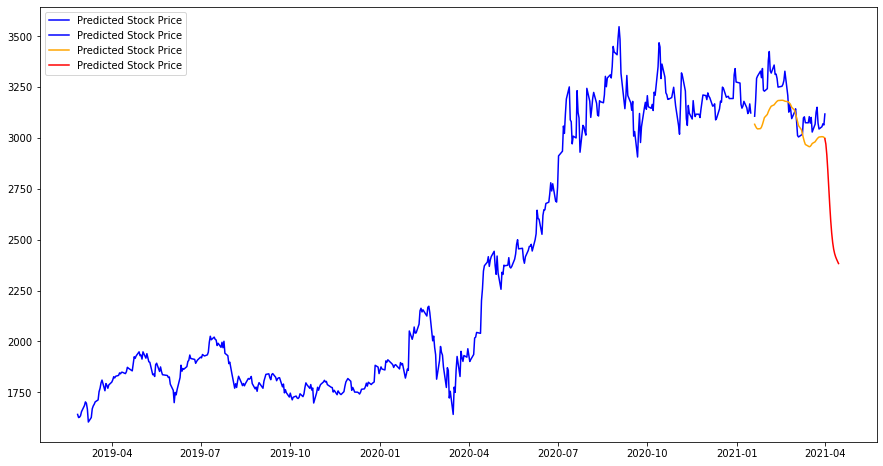

In [11]:
plt.figure(figsize=(15,8))
plt.plot(dataset_train.iloc[:,0:1][2300:], color = 'blue', label = 'Predicted Stock Price')
plt.plot(dataset_test.iloc[:,0:1], color = 'blue', label = 'Predicted Stock Price')
plt.plot(future_dates_test, color = 'orange', label = 'Predicted Stock Price')
plt.plot(future_dates1, color = 'red', label = 'Predicted Stock Price')
plt.legend()